In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
df_ratings = pd.read_csv('ratings.csv')
df_books = pd.read_csv('books.csv')

In [3]:
df_ratings

,Unnamed: 0,nickname,user_id,book_id,title,rating
0,0,munsun09,744743170,292816855,작별인사,4
1,1,모든것이좋아,775285294,292816855,작별인사,5
2,2,인생조짐,739955181,292816855,작별인사,5
3,3,닉스,707795116,292816855,작별인사,4
4,4,소리벽,779029169,292816855,작별인사,4
...,...,...,...,...,...,...
92039,92039,madwife,788864126,110533,우울과 부드러움의 이야기,4
92040,92040,히카루,715738195,140567,창이 있는 서점에서,3
92041,92041,선술집,783402183,53071,물의 수첩,3
92042,92042,윤재홍,korg,1857516,사랑,5


In [4]:
df_books

,Unnamed: 0,title,book_id,author,publisher,price,review_cnt,review_score,pub_year,country,weighted_vote
0,0,작별인사,292816855,김영하,복복서가,"12,600",27.0,4.5,2022년 5월,한국,4.418568
1,1,애쓰지 않아도,293773169,최은영,마음산책,"13,050",10.0,4.5,2022년 4월,한국,4.292718
2,2,불편한 편의점,290457417,김호연,나무옆의자,"12,600",64.0,4.0,2021년 4월,한국,3.972614
3,3,2022 제13회 젊은작가상 수상작품집,292067158,임솔아,문학동네,"6,930",42.0,4.0,2022년 4월,한국,3.958602
4,4,책들의 부엌,294030893,김지혜,팩토리나인,"13,050",40.0,5.0,2022년 5월,한국,4.932193
...,...,...,...,...,...,...,...,...,...,...,...
36448,36448,자민당,123814,도가와,시공사,"3,600",0.0,0.0,1991년 3월,일본,2.219900
36449,36449,상류사회 1,72563,야마사키,청조사,"3,600",0.0,0.0,1990년 7월,일본,2.219900
36450,36450,국역일체경 國譯一切經,156399796,알라딘,大東出版社,"1,350,000",0.0,0.0,1988년 1월,일본,2.219900
36451,36451,위대한 몰락,3885185,엔도,홍성사,"3,420",0.0,0.0,1983년 12월,일본,2.219900


In [5]:
n_users = len(df_ratings['user_id'].unique())
n_movies = len(df_ratings['book_id'].unique())
n_users, n_movies # 4884 명의 유저가 총 11559책에 대해 리뷰 남김

(4884, 11559)

In [6]:
len(df_books) # 그러나 책 정보의 모든 권 수는 36453권

36453

# 아이템 기반 협업 필터링 구현
동일한 book_id에 중복되는 user_id가 있으므로 해당 리뷰들은 평균을 내어 rating 값을 계산....... 하려고 했으나

drop_duplicates 이용해서 book_id user_id 하면 되니깐

In [7]:
grp_s_d = df_ratings.groupby(['user_id', 'title'])[['rating']].mean()
grp_s_d.reset_index(inplace=True)
grp_s_d

df_user_books_ratings = grp_s_d.pivot(
    index='title',
    columns='user_id',
    values='rating'
).fillna(0)

In [8]:
df_user_books_ratings

user_id,01057797863,01075216971,01076761629,01094971575,019423751x,0516,1034start,11317,1203,191970,...,yujin,yuliannaaj,yumaaa,yurika,yyjbd,zedi21,zerolife,ziggel,zoo,zoocom
title,,,,,,,,,,,,,,,,,,,,,
#킬러스타그램,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0 영 ZERO 零,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0%를 향하여,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007 데블 메이 케어,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힌트는 도련님,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
힐,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
힐 하우스의 유령,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 코사인 유사도

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_rate = cosine_similarity(df_user_books_ratings, df_user_books_ratings)
print(similarity_rate)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
similarity_rate_df = pd.DataFrame(
    data=similarity_rate,
    index=df_user_books_ratings.index,
    columns=df_user_books_ratings.index
)

In [11]:
similarity_rate_df

title,#킬러스타그램,0 영 ZERO 零,0%를 향하여,0.4,007 데블 메이 케어,0시간으로,0시를 향하여,0의 살인,0인칭의 자리,1%의 교실,...,히트 아일랜드,히페리온,히페리온의 몰락,히포크라테스 선서,히포크라테스 우울,힌트는 도련님,힐,힐 하우스의 유령,힘내라 돼지,"女子, 사임당"
title,,,,,,,,,,,,,,,,,,,,,
#킬러스타그램,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
0 영 ZERO 零,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.098464,0.058627,0.048218,0.000000,0.0,0.0,0.0,0.0
0%를 향하여,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.243685,0.000000,0.000000,0.424094,0.0,0.0,0.0,0.0
007 데블 메이 케어,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.184944,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힌트는 도련님,0.0,0.0,0.0,0.424094,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.092135,0.186022,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0
힐,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
힐 하우스의 유령,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0


In [12]:
def recommand_book(title): 
    return similarity_rate_df[title].sort_values(ascending=False)[:20]

In [13]:
recommand_book("그리고 아무도 없었다")

title
그리고 아무도 없었다           1.000000
오리엔트 특급살인             0.166760
0시를 향하여               0.153418
움직이는 손가락              0.149242
애크로이드 살인사건            0.147413
제로의 초점                0.136049
십각관의 살인               0.134896
할로윈 파티                0.128709
주군의 태양 속 폭풍우 치는 밤에    0.128709
스타일즈 저택의 죽음           0.128709
일본 침몰                 0.128709
흑거미 클럽                0.127921
북벌                    0.127921
검은 옷을 입은 신부           0.127921
세계의 겨울 2              0.127921
Y의 비극                 0.127723
용의자 X의 헌신             0.124714
살인자들의 섬               0.123286
스텝파더 스텝               0.119060
구석의 노인 사건집            0.117701
Name: 그리고 아무도 없었다, dtype: float64

# 잠재 요인 기반 협업 필터링

### 피어슨 상관 계수 값 활용

In [14]:
book_user_pivot = df_user_books_ratings.values
book_user_pivot.shape

(11558, 4883)

### svd 분해

In [15]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(book_user_pivot)
matrix.shape

(11558, 12)

In [16]:
SVD

TruncatedSVD(n_components=12)

In [17]:
corr = np.corrcoef(matrix)
corr.shape

(11558, 11558)

In [18]:
book_title = df_user_books_ratings.index
book_title_list = list(book_title)

In [19]:
def recommand_book(title):
    target = book_title_list.index(title)
    corr_target = corr[target]
    result = list(book_title[(corr_target>=0.9)])
    print(len(result))
    return result[:50]

In [21]:
recommand_book('인간 실격')

13


['[세트] 초판본 동물 농장 + 초판본 1984 - 전2권',
 '그래도, 아직은 봄밤',
 '동물농장',
 '두 도시 이야기',
 '로드킬',
 '마음',
 '맛',
 '아킬레우스의 노래',
 '인간 실격',
 '임진무쌍 황진',
 '춘향전',
 '키스의 지수',
 '핑거스미스']

# 유저 history 기반 개인화 추천

In [22]:
df_ratings = pd.read_csv('ratings.csv')
df_books = pd.read_csv('books.csv')

In [23]:
grp_s_d = df_ratings.groupby(['user_id', 'book_id'])[['rating']].mean()
grp_s_d.reset_index(inplace=True)
grp_s_d

df_user_book_ratings = grp_s_d.pivot( 
    index='user_id',
    columns='book_id',
    values='rating'
).fillna(0)

In [24]:
matrix = np.asmatrix(df_user_book_ratings)
user_ratings_mean = np.mean(matrix, axis = 1)
matrix_user_mean = matrix - user_ratings_mean.reshape(-1,1)

In [25]:
matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
pd.DataFrame(matrix_user_mean,
             index=df_user_book_ratings.index,
             columns = df_user_book_ratings.columns)

book_id,281,320,881,1640,2629,2976,3445,3831,4397,4668,...,293691421,293773169,293775330,293966952,294055826,294249394,294266167,294426044,294426595,294863570
user_id,,,,,,,,,,,,,,,,,,,,,
01057797863,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,...,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499,-0.004499
01075216971,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,...,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191,-0.005191
01076761629,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,...,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113,-0.012113
01094971575,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,...,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163
019423751x,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,...,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998,-0.008998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zedi21,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,...,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115,-0.003115
zerolife,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,...,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942,-0.002942
ziggel,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,...,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163,-0.002163


# 행렬 분해

In [27]:
import scipy.sparse.linalg as s

In [28]:
U, sigma, Vt = s.svds(matrix_user_mean, k =12)

In [29]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)
sigma = np.diag(sigma)

(4883, 12)
(12,)
(12, 11558)


In [30]:
sigma.shape

(12, 12)

In [31]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings,
                            index=df_user_book_ratings.index,
                            columns = df_user_book_ratings.columns)
df_svd_preds

book_id,281,320,881,1640,2629,2976,3445,3831,4397,4668,...,293691421,293773169,293775330,293966952,294055826,294249394,294266167,294426044,294426595,294863570
user_id,,,,,,,,,,,,,,,,,,,,,
01057797863,0.005807,0.001789,0.000883,0.005034,0.001923,0.001200,0.006613,-0.005116,0.014285,0.001469,...,0.001199,0.002273,0.037059,0.000699,0.022327,0.015584,0.003942,0.039847,0.005361,0.005213
01075216971,0.010799,0.005961,0.005964,0.008224,0.002319,0.005942,0.013780,-0.000353,0.032621,0.006338,...,0.005320,0.006705,0.002254,0.005674,0.002369,0.002724,0.010628,-0.002430,0.007770,0.025694
01076761629,0.009549,0.009633,0.007292,0.008803,0.009720,0.007513,0.009410,-0.001863,-0.015602,0.006977,...,0.006847,0.007290,0.002944,0.007042,0.042377,0.004893,0.008595,-0.001633,0.007841,-0.008185
01094971575,0.001933,-0.000663,-0.000745,0.001946,-0.001067,-0.000580,0.003291,0.006344,0.024782,-0.000085,...,-0.000747,0.000413,0.014869,-0.000835,0.002836,0.004662,0.001573,0.014487,0.001795,0.013609
019423751x,0.002213,0.003395,0.000620,0.002189,0.010911,0.001282,-0.000276,-0.019686,-0.033983,0.001180,...,0.000060,0.002375,-0.009871,0.000683,0.053669,-0.006532,-0.000156,-0.015448,0.001828,0.013737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zedi21,0.001178,0.001154,0.001010,0.001980,0.001968,0.001240,0.001975,-0.000713,-0.000070,0.001446,...,0.000652,0.002496,-0.003406,0.001041,0.001438,-0.002541,0.001583,-0.006794,0.002359,0.000849
zerolife,0.001426,-0.000735,-0.001329,0.001810,0.000333,-0.000996,0.002243,-0.002342,0.011355,-0.000525,...,-0.001405,0.000348,0.015175,-0.001393,0.011477,0.003844,0.000639,0.013806,0.001728,0.007903
ziggel,0.001049,-0.001079,-0.002029,-0.001172,0.002871,-0.002011,-0.003793,-0.001640,0.016727,-0.002010,...,-0.001763,-0.002167,-0.006615,-0.001920,0.037896,-0.003669,-0.003251,-0.004978,-0.002373,0.009979


# 사용자 추천 함수 구현

In [32]:
def recommend_books(df_svd_preds, user_id, ori_books_df, ori_ratings_df, num_recommendations=5):
    sorted_user_predictions = df_svd_preds.loc[user_id].sort_values(ascending=False)
    
    user_data = ori_ratings_df[ori_ratings_df.user_id == user_id]
    
    user_history = user_data.merge(ori_books_df, on = 'book_id').sort_values(['rating'], ascending=False)
    
    recommendations = ori_books_df[~ori_books_df['book_id'].isin(user_history['book_id'])]
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on = 'book_id')
    recommendations = recommendations.rename(columns = {user_id : 'Predictions'}).sort_values('Predictions', ascending=False).iloc[:num_recommendations, :]
    
    return user_history, recommendations

In [33]:
already_rated, predictions = recommend_books(df_svd_preds, '712897197', df_books, df_ratings, 10)

In [34]:
already_rated

,Unnamed: 0_x,nickname,user_id,book_id,title_x,rating,Unnamed: 0_y,title_y,author,publisher,price,review_cnt,review_score,pub_year,country,weighted_vote
14,77223,일본추리소설,712897197,5957079,크림슨의 미궁,5,32427,크림슨의 미궁,기시,창해,"12,600",98.0,4.5,2009년 12월,일본,4.476969
2,72521,일본추리소설,712897197,62312717,고백,5,4610,고백,박성원,현대문학,"11,700",2.0,4.5,2015년 6월,한국,3.739967
4,68172,일본추리소설,712897197,413721,퍼레이드,5,32327,퍼레이드,요시다,은행나무,"10,800",130.0,4.0,2005년 3월,일본,3.986411
24,87246,일본추리소설,712897197,71630068,골든애플,5,33517,골든애플,마리,비채,"11,700",140.0,5.0,2015년 12월,일본,4.980283
16,79205,일본추리소설,712897197,8119743,해피엔드에 안녕을,5,32577,해피엔드에 안녕을,우타노,문학동네,"9,900",61.0,4.0,2010년 11월,일본,3.971289
1,65876,일본추리소설,712897197,62312717,고백,5,4610,고백,박성원,현대문학,"11,700",2.0,4.5,2015년 6월,한국,3.739967
15,78762,일본추리소설,712897197,936359,ZOO,4,32535,ZOO,오쓰이치,황매(푸른바람),"10,800",104.0,4.0,2007년 7월,일본,3.983047
29,90491,일본추리소설,712897197,63787727,더 팀,4,34354,더 팀,이노우에,엔트리(메가스터디북스),"12,150",159.0,4.5,2015년 8월,일본,4.485749
25,88129,일본추리소설,712897197,3630457,악몽의 엘리베이터,4,33683,악몽의 엘리베이터,기노시타,살림,"10,800",79.0,4.0,2009년 5월,일본,3.977749
23,86652,일본추리소설,712897197,6640600,술래의 발소리,4,33427,술래의 발소리,미치오,북홀릭(bookholic),"9,900",56.0,4.0,2010년 6월,일본,3.968770


In [35]:
predictions

,Unnamed: 0,title,book_id,author,publisher,price,review_cnt,review_score,pub_year,country,weighted_vote,Predictions
5089,23216,미스터 메르세데스,56869297,스티븐,황금가지,"13,500",774.0,4.5,2015년 7월,영미,4.497058,0.586022
8563,31680,용의자 X의 헌신,116498287,히가시노,재인,"15,120",101.0,4.5,2017년 8월,일본,4.477646,0.526002
4574,22590,걸 온 더 트레인,62809465,폴라,북폴리오,"12,420",653.0,4.5,2015년 8월,영미,4.496514,0.520141
8667,31797,벚꽃지는 계절에 그대를 그리워하네,187314456,우타노,한즈미디어(한스미디어),"13,500",44.0,4.5,2019년 3월,일본,4.449331,0.396042
9066,32271,삼월은 붉은 구렁을,635395,온다,북폴리오,"9,000",298.0,4.5,2006년 3월,일본,4.492374,0.393676
5165,23297,별도 없는 한밤에,66353533,스티븐,황금가지,"13,500",303.0,4.5,2015년 9월,영미,4.492500,0.392752
117,143,7년의 밤,9886703,정유정,은행나무,"13,050",864.0,4.5,2011년 3월,한국,4.497364,0.381101
8583,31709,공허한 십자가,292608680,히가시노,자음과모음,"13,500",26.0,4.5,2022년 4월,일본,4.415552,0.359426
8630,31759,한여름의 방정식,38260542,히가시노,재인,"15,120",142.0,4.5,2014년 3월,일본,4.484055,0.347104
8587,31713,몽환화,289671125,히가시노,비채,"13,320",18.0,4.5,2022년 2월,일본,4.379995,0.343470


# T-SNE

In [36]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors # Use this is for creating a cursor-interactive plot with "%matplotlib notebook"
from sklearn.decomposition import NMF # Use this for training Non-negative Matrix Factorization
from sklearn.utils.extmath import randomized_svd # Use this for training Singular Value Decomposition
from sklearn.manifold import TSNE # Use this for training t-sne manifolding

plt.style.use('ggplot') # You can also use different style

# just for plot checking, use this option
# %matplotlib inline

# for interactive plot
# If you use this option, plot will appear at first-drawn position
%matplotlib notebook

warnings.filterwarnings('ignore')

In [37]:
grp_s_d = df_ratings.groupby(['user_id', 'book_id'])[['rating']].mean()
grp_s_d.reset_index(inplace=True)
grp_s_d
# df_ratings = df_ratings.drop_duplicates(['book_id', 'user_id'])

A = grp_s_d.pivot(
    index='book_id',
    columns='user_id',
    values='rating'
).fillna(0).values
A.shape

(11558, 4883)

In [38]:
k = 12
model_nmf = NMF(n_components=k)
W = model_nmf.fit_transform(A)

In [39]:
W.shape

(11558, 12)

In [40]:
# your code here

model_tsne = TSNE(n_components=2)
W_embedded = model_tsne.fit_transform(W) # W대신에 피어슨 쓸때 사용한 11558, 2 짜리 matrix 써도 됨..

# 실제 2차원으로 변환되었는지 확인
# 변환된 결과는 (n_movies, 2)의 형태
#print(W_embedded.embedding_.shape)
W_embedded.shape

(11558, 2)

In [41]:
W_embedded

array([[ -0.8736219,   8.004545 ],
       [ 54.60809  , -39.249084 ],
       [ 47.47888  ,  44.385967 ],
       ...,
       [-39.025948 ,  42.27339  ],
       [ 11.829644 ,  12.37305  ],
       [-12.975432 ,  71.85994  ]], dtype=float32)

In [42]:
grp_s_d = df_ratings.groupby(['user_id', 'book_id'])[['rating']].mean()
grp_s_d.reset_index(inplace=True)
grp_s_d

A2 = grp_s_d.pivot(
    index='book_id',
    columns='user_id',
    values='rating'
).fillna(0)

allList = list(A2.index)
print(len(allList))
print(type(allList))
print('---')

print(len(df_books["book_id"]))
book_id_df = pd.DataFrame(list(df_books["book_id"])) #32763
# print(len(book_id_df))
idx = list(book_id_df[0].isin(allList))
# print(len(i))
cnt=0
for i in idx:
    if i == True:
        cnt+=1
print(cnt) # 10166


book_with_embedding = df_books[df_books["book_id"].isin(allList)]
book_with_embedding['tsne1'] = W_embedded[:,0]
book_with_embedding['tsne2'] = W_embedded[:,1]
book_with_embedding

11558
<class 'list'>
---
36453
11558


,Unnamed: 0,title,book_id,author,publisher,price,review_cnt,review_score,pub_year,country,weighted_vote,tsne1,tsne2
0,0,작별인사,292816855,김영하,복복서가,"12,600",27.0,4.5,2022년 5월,한국,4.418568,-0.873622,8.004545
1,1,애쓰지 않아도,293773169,최은영,마음산책,"13,050",10.0,4.5,2022년 4월,한국,4.292718,54.608089,-39.249084
2,2,불편한 편의점,290457417,김호연,나무옆의자,"12,600",64.0,4.0,2021년 4월,한국,3.972614,47.478882,44.385967
3,3,2022 제13회 젊은작가상 수상작품집,292067158,임솔아,문학동네,"6,930",42.0,4.0,2022년 4월,한국,3.958602,21.532513,-38.402054
5,5,저주토끼,290846875,정보라,아작,"13,320",37.0,4.0,2022년 4월,한국,3.953155,19.177895,-79.794937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36307,36307,[세트] 모방범 - 전3권,34079048,미야베,문학동네,"37,260",6.0,4.5,2012년 3월,일본,4.174271,-27.974554,36.813374
36344,36344,우울과 부드러움의 이야기,110533,무라카미,한뜻,"5,400",2.0,3.0,1997년 9월,일본,2.739967,-11.479511,33.279099
36358,36358,창이 있는 서점에서,140567,유미리,무당미디어,"6,500",2.0,3.0,1997년 4월,일본,2.739967,-39.025948,42.273392
36364,36364,물의 수첩,53071,이주잉,한마음사,"4,500",1.0,3.0,1996년 10월,일본,2.609950,11.829644,12.373050


In [43]:
A2

user_id,01057797863,01075216971,01076761629,01094971575,019423751x,0516,1034start,11317,1203,191970,...,yujin,yuliannaaj,yumaaa,yurika,yyjbd,zedi21,zerolife,ziggel,zoo,zoocom
book_id,,,,,,,,,,,,,,,,,,,,,
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294249394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294266167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294426044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
book_with_embedding

,Unnamed: 0,title,book_id,author,publisher,price,review_cnt,review_score,pub_year,country,weighted_vote,tsne1,tsne2
0,0,작별인사,292816855,김영하,복복서가,"12,600",27.0,4.5,2022년 5월,한국,4.418568,-0.873622,8.004545
1,1,애쓰지 않아도,293773169,최은영,마음산책,"13,050",10.0,4.5,2022년 4월,한국,4.292718,54.608089,-39.249084
2,2,불편한 편의점,290457417,김호연,나무옆의자,"12,600",64.0,4.0,2021년 4월,한국,3.972614,47.478882,44.385967
3,3,2022 제13회 젊은작가상 수상작품집,292067158,임솔아,문학동네,"6,930",42.0,4.0,2022년 4월,한국,3.958602,21.532513,-38.402054
5,5,저주토끼,290846875,정보라,아작,"13,320",37.0,4.0,2022년 4월,한국,3.953155,19.177895,-79.794937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36307,36307,[세트] 모방범 - 전3권,34079048,미야베,문학동네,"37,260",6.0,4.5,2012년 3월,일본,4.174271,-27.974554,36.813374
36344,36344,우울과 부드러움의 이야기,110533,무라카미,한뜻,"5,400",2.0,3.0,1997년 9월,일본,2.739967,-11.479511,33.279099
36358,36358,창이 있는 서점에서,140567,유미리,무당미디어,"6,500",2.0,3.0,1997년 4월,일본,2.739967,-39.025948,42.273392
36364,36364,물의 수첩,53071,이주잉,한마음사,"4,500",1.0,3.0,1996년 10월,일본,2.609950,11.829644,12.373050


In [45]:
import platform
import matplotlib
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

<IPython.core.display.Javascript object>


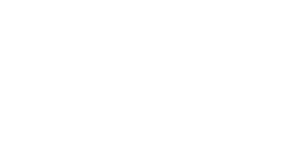

<IPython.core.display.Javascript object>


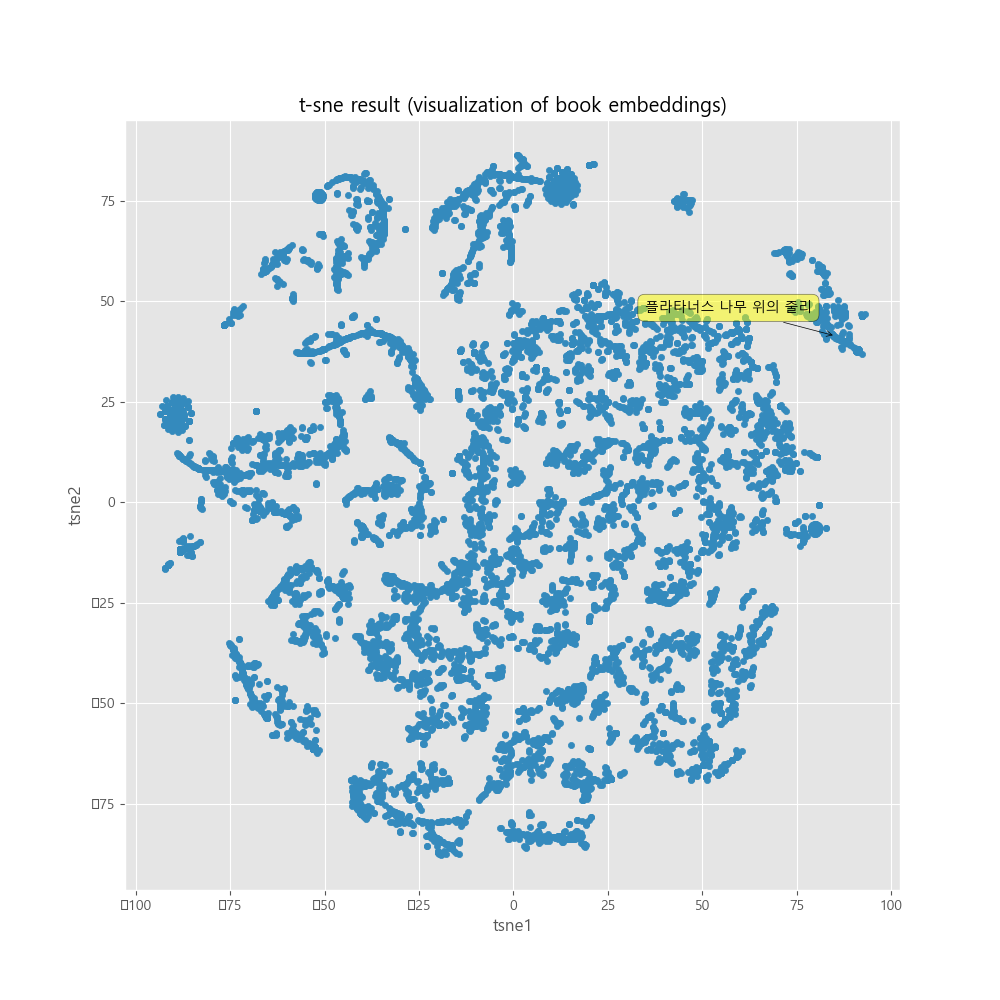

In [47]:
plt.rcParams['figure.figsize'] = [10, 10] # you can change size for your style
plt.xlim(book_with_embedding['tsne1'].min(), book_with_embedding['tsne1'].max()) # 축 범위 조정
plt.ylim(book_with_embedding['tsne2'].min(), book_with_embedding['tsne2'].max()) # 축 범위 조정
%matplotlib notebook
# your code here
book_with_embedding.plot.scatter('tsne1', 'tsne2')


# Scatter plot을 그리기
mplcursors.cursor(multiple = 0).connect(
    "add", lambda sel: sel.annotation.set_text(
          list(book_with_embedding["title"])[sel.target.index]
))

# 위의 mplcursors 코드를 이용해 각 point마다 labelling을 할 수 있습니다.
# YOUR_ANNOTATION_LIST는 영화 제목이 되어도 좋고, 영화 장르가 되어도 좋습니다.
# (직관성을 위해 '영화장르'로 labelling 하는 것을 추천합니다.)

plt.title('t-sne result (visualization of book embeddings)')
plt.show()